# INF552 Homework2

## (b) Exploring the data

## i. How many rows are in this data set? How many columns? What do the rows and columns represent?  
### [47840 rows x 5 columns], 
### Rows represent a sample
### columns represent different predictors and the last column represent the real outcome

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xlrd
from pandas import DataFrame
from scipy import stats
from tabulate import tabulate
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as stat

excel_path = r'/Users/irischeng/INF552/HOMEWORK/homework2/Folds5x2_pp.xlsx' 

data = xlrd.open_workbook(excel_path)
#print (data)

#obtain all sheets
sheets = data.sheet_names()
#print(sheets)
#len(sheets), sheets=5

PowerPlant_data = DataFrame()
#for i in range(len(sheets)):
for i in range(1):
    #read every sheet and append to the PowerPlant_data
    df = pd.read_excel(excel_path, sheet_name=i,names = ['T','V','AP','RH','EP'])
    #print(df)
    PowerPlant_data = PowerPlant_data.append(df, ignore_index=True)

#PowerPlant_data(names = ['T','AP','RH','V','EP'])
print(PowerPlant_data)
#type(PowerPlant_data)





          T      V       AP     RH      EP
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76

## ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.
### T and EP seems to have linera realatioship,V and EP seems to have linera realatioship.

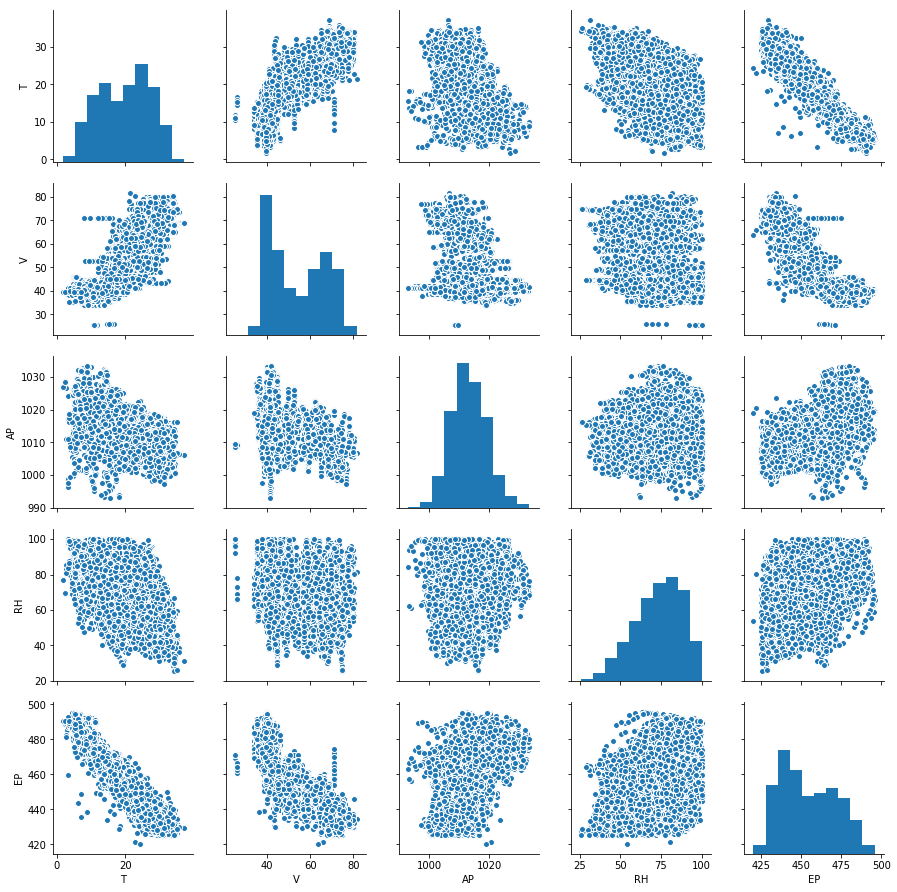

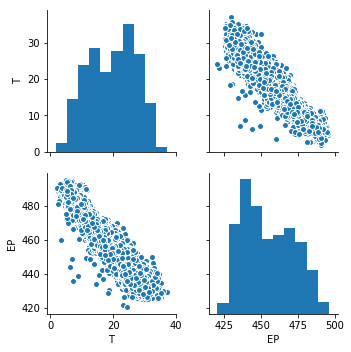

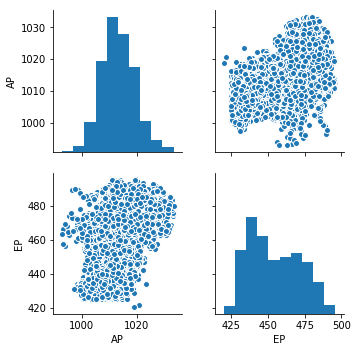

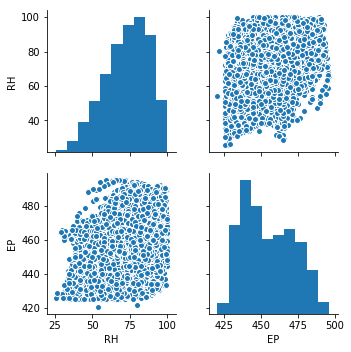

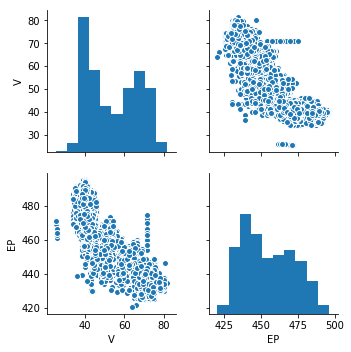

In [2]:
sns.pairplot(PowerPlant_data, kind='scatter')
plt.show()
#scatterplots of T AND EP
sns.pairplot(PowerPlant_data[['T','EP']], kind = 'scatter')
plt.show()
#scatterplots of AP AND EP
sns.pairplot(PowerPlant_data[['AP','EP']], kind = 'scatter')
plt.show()
#scatterplots of RH AND EP
sns.pairplot(PowerPlant_data[['RH','EP']], kind = 'scatter')
plt.show()
#scatterplots of V AND EP
sns.pairplot(PowerPlant_data[['V','EP']], kind = 'scatter')
plt.show()

## iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [3]:
# #print(PowerPlant_data.columns.values.tolist())
# for i in PowerPlant_data.columns.values.tolist():
#     print(i)
#     mean = sts.mean(PowerPlant_data['i'])
#     print(mean)

#all means
T_mean = np.mean(PowerPlant_data['T'])
#print(T_mean)
AP_mean = np.mean(PowerPlant_data['AP'])
RH_mean = np.mean(PowerPlant_data['RH'])
V_mean = np.mean(PowerPlant_data['V'])
EP_mean = np.mean(PowerPlant_data['EP'])

#all medians
T_median = np.median(PowerPlant_data['T'])
#print(T_median)
AP_median = np.median(PowerPlant_data['AP'])
RH_median = np.median(PowerPlant_data['RH'])
V_median = np.median(PowerPlant_data['V'])
EP_median = np.median(PowerPlant_data['EP'])

#all range
T_range =max(PowerPlant_data['T'])-min(PowerPlant_data['T'])
#print(T_range)
AP_range =max(PowerPlant_data['AP'])- min(PowerPlant_data['AP'])
RH_range =max(PowerPlant_data['RH'])- min(PowerPlant_data['RH'])
V_range =max(PowerPlant_data['V'])-min(PowerPlant_data['V'])
EP_range =max(PowerPlant_data['EP'])-min(PowerPlant_data['EP'])

#first quartiles
T_1q = np.percentile(PowerPlant_data['T'], 25)
AP_1q = np.percentile(PowerPlant_data['AP'], 25)
RH_1q = np.percentile(PowerPlant_data['RH'], 25)
V_1q = np.percentile(PowerPlant_data['V'], 25)
EP_1q = np.percentile(PowerPlant_data['EP'], 25)

#third quartiles
T_3q = np.percentile(PowerPlant_data['T'], 75)
AP_3q = np.percentile(PowerPlant_data['AP'], 75)
RH_3q = np.percentile(PowerPlant_data['RH'], 75)
V_3q = np.percentile(PowerPlant_data['V'], 75)
EP_3q = np.percentile(PowerPlant_data['EP'], 75)

#quartiles range
T_qrange = T_3q-T_1q 
AP_qrange = AP_3q-AP_1q
RH_qrange = RH_3q-RH_1q
V_qrange = V_3q-V_1q
EP_qrange = EP_3q-EP_1q


table_header = [' ','T','V','AP','RH','EP']
table_data = [('Mean',T_mean, V_mean, AP_mean, RH_mean, EP_mean),
              ('Median',T_median, V_median, AP_median, RH_median, EP_median),
              ('Range',T_range, V_range, AP_range, RH_range, EP_range),
              ('1Q',T_1q, V_1q, AP_1q, RH_1q, EP_1q),
              ('3Q',T_3q, V_3q, AP_3q, RH_3q, EP_3q),
              ('QRange',T_qrange, AP_qrange, RH_qrange, V_qrange, EP_qrange)
             ]
print(tabulate(table_data, headers = table_header, tablefmt ='grid'))


+--------+---------+---------+-----------+---------+---------+
|        |       T |       V |        AP |      RH |      EP |
+========+=========+=========+===========+=========+=========+
| Mean   | 19.6512 | 54.3058 | 1013.26   | 73.309  | 454.365 |
+--------+---------+---------+-----------+---------+---------+
| Median | 20.345  | 52.08   | 1012.94   | 74.975  | 451.55  |
+--------+---------+---------+-----------+---------+---------+
| Range  | 35.3    | 56.2    |   40.41   | 74.6    |  75.5   |
+--------+---------+---------+-----------+---------+---------+
| 1Q     | 13.51   | 41.74   | 1009.1    | 63.3275 | 439.75  |
+--------+---------+---------+-----------+---------+---------+
| 3Q     | 25.72   | 66.54   | 1017.26   | 84.83   | 468.43  |
+--------+---------+---------+-----------+---------+---------+
| QRange | 12.21   |  8.16   |   21.5025 | 24.8    |  28.68  |
+--------+---------+---------+-----------+---------+---------+


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?
### Yes, there is a statistically significant association between the predictor and the response.
### Yes, there are sme outliers.

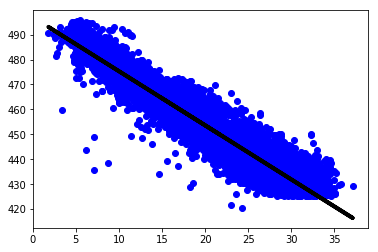

Outliers are:
[0.62951938 0.74190911 1.95129733 ... 1.56583973 0.64797565 0.26150656]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:30   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [4]:
# build a linear regression model
regr_T = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
regr_T.fit(PowerPlant_data['T'].values.reshape(-1,1), PowerPlant_data['EP']) 
 
# slope and intercept
# a_T, b_T = regr_T.coef_, regr_T.intercept_
# print (a)
# print(b)

T_predict = regr_T.predict(PowerPlant_data['T'].values.reshape(-1,1))
#print(len(EP_predict))

#real data 
plt.scatter(PowerPlant_data['T'], PowerPlant_data['EP'].values, color='blue')
#plt.show()
#fit data
plt.plot(PowerPlant_data['T'], T_predict, color='black', linewidth=4)
plt.show()


#handle with outliers
z_T = np.abs(stats.zscore(PowerPlant_data['T']))
print("Outliers are:")
print(z_T)

x_consc1 = sm.add_constant(PowerPlant_data['T'])
estc1 =sm.OLS(PowerPlant_data['EP'],x_consc1)
est2c1 = estc1.fit()
print(est2c1.summary())

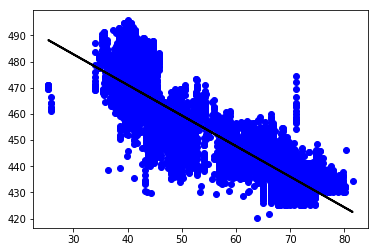

Outliers are:
[0.98729659 0.68104512 1.17301765 ... 1.57581141 1.19177803 0.64641916]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:31   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [5]:
# build a linear regression model
regr_V = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
regr_V.fit(PowerPlant_data['V'].values.reshape(-1,1), PowerPlant_data['EP']) 
 
# slope and intercept
a_V, b_V = regr_V.coef_, regr_V.intercept_
#print (a)
#print(b)

V_predict = regr_V.predict(PowerPlant_data['V'].values.reshape(-1,1))
#print(len(EP_predict))

#real data 
plt.scatter(PowerPlant_data['V'], PowerPlant_data['EP'].values, color='blue')
#plt.show()
#fit data
plt.plot(PowerPlant_data['V'], V_predict, color='black', linewidth=2)
plt.show()

#handle with outliers
z_V = np.abs(stats.zscore(PowerPlant_data['V']))
print("Outliers are:")
print(z_V)


x_consc2 = sm.add_constant(PowerPlant_data['V'])
estc2 =sm.OLS(PowerPlant_data['EP'],x_consc2)
est2c2 = estc2.fit()
print(est2c2.summary())

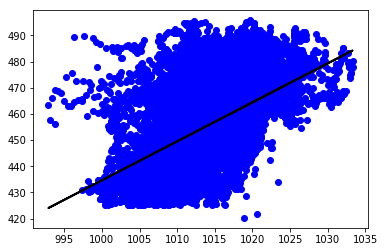

Outliers are:
[1.8204884  1.1418628  0.18507756 ... 0.05709854 0.1011913  0.66867722]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:31   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [6]:
# build a linear regression model
regr_AP = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
regr_AP.fit(PowerPlant_data['AP'].values.reshape(-1,1), PowerPlant_data['EP']) 
 
# # slope and intercept
# a_AP, b_AP = regr_AP.coef_, regr_AP.intercept_
# #print (a)
# #print(b)

AP_predict = regr_AP.predict(PowerPlant_data['AP'].values.reshape(-1,1))
#print(len(EP_predict))

#real data 
plt.scatter(PowerPlant_data['AP'], PowerPlant_data['EP'].values, color='blue')
#plt.show()
#fit data
plt.plot(PowerPlant_data['AP'], AP_predict, color='black', linewidth=2)
plt.show()

#handle with outliers
z_AP = np.abs(stats.zscore(PowerPlant_data['AP']))
print("Outliers are:")
print(z_AP)


x_consc3 = sm.add_constant(PowerPlant_data['AP'])
estc3 =sm.OLS(PowerPlant_data['EP'],x_consc3)
est2c3 = estc3.fit()
print(est2c3.summary())






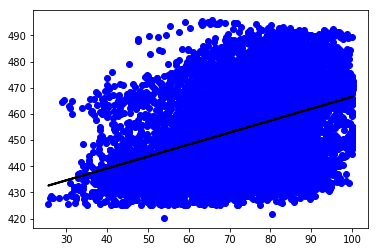

Outliers are:
[0.00951935 0.97462052 1.2898397  ... 2.52261812 0.74790051 0.37254534]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:31   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [7]:
# build a linear regression model
regr_RH = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
regr_RH.fit(PowerPlant_data['RH'].values.reshape(-1,1), PowerPlant_data['EP']) 
 
# slope and intercept
a_RH, b_RH = regr_RH.coef_, regr_RH.intercept_
#print (a)
#print(b)

RH_predict = regr_RH.predict(PowerPlant_data['RH'].values.reshape(-1,1))
#print(len(EP_predict))

#real data 
plt.scatter(PowerPlant_data['RH'], PowerPlant_data['EP'].values, color='blue')
#plt.show()
#fit data
plt.plot(PowerPlant_data['RH'], RH_predict, color='black', linewidth=2)
plt.show()

#handle with outliers
z_RH = np.abs(stats.zscore(PowerPlant_data['RH']))
print("Outliers are:")
print(z_RH)

x_consc4 = sm.add_constant(PowerPlant_data['RH'])
estc4 =sm.OLS(PowerPlant_data['EP'],x_consc4)
est2c4 = estc4.fit()
print(est2c4.summary())

## (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?
## All predictors can reject the null hypothesis as their p-value are small.

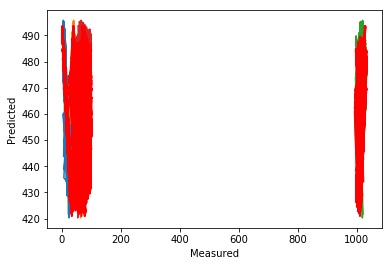

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [8]:
x = PowerPlant_data[['T','V','AP','RH']]
y = PowerPlant_data['EP']
x_cons = sm.add_constant(x)
# print(x)
# print(y)
# build a linear regression model
regr = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
regr.fit(x, y) 

# slope and intercept
beta = []
a, b = regr.coef_, regr.intercept_
beta = [b]
for i in regr.coef_:
    #print(i)
    beta.append(i)
#print("all beta(from 0 to 4):")
#print (a)
#print(beta)
#print(b)

predict = regr.predict(x)
#print(len(predict))

# #real data 
# plt.scatter(x, y, color='blue')
# #plt.show()
# #fit data
# plt.plot(x, predict, color='black', linewidth=2)
# plt.show()

#ax.scatter(y, predict)
plt.plot(x,y)
plt.plot(x,predict,color ='red', linewidth=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

#p-value
est =sm.OLS(y,x_cons)
est2 = est.fit()
print(est2.summary())






## (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

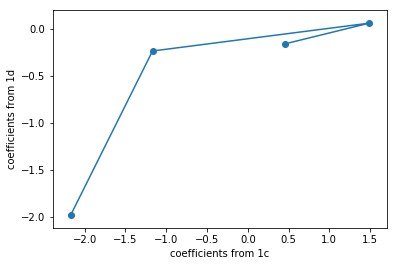

In [9]:
#T, V, AP, RH
X_1C = [-2.1713, -1.1681, 1.4899, 0.4557]
Y_1D = [-1.9775, -0.2339, 0.0621, -0.1581]
plt.plot(X_1C, Y_1D)
plt.scatter(X_1C, Y_1D)
plt.xlabel('coefficients from 1c')
plt.ylabel('coefficients from 1d')

plt.show()



## (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y =β0 +β1X+β2X2 +β3X3 +ε
### Yes, there is evidence of nonlinear association between any of the predictors and the response as the p_value of x^2 and x^3 is small.

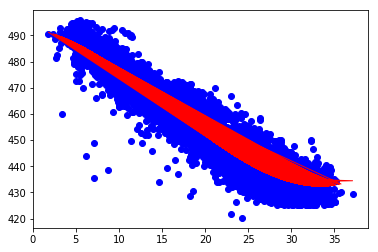

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:33   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
#x_poly_T = poly_reg.transform(PowerPlant_data['T'])
x_poly_T = poly_reg.fit_transform(PowerPlant_data['T'].values.reshape(-1,1))
#y_poly_T = poly_reg.fit_transform(PowerPlant_data['EP'].values.reshape(-1,1))
# print(x_poly_T)
# print(x_poly_T.ndim)
#print(x_poly_T.size)
# print(PowerPlant_data['EP'].values.reshape(-1,1))
#print(y_poly_T.size)

# build a linear regression model
Poly_regr_T = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
Poly_regr_T.fit(x_poly_T, PowerPlant_data['EP'])
#Poly_regr_T.fit(x_poly_T, y_poly_T) 
 
# slope and intercept
a_Poly_T, b_Poly_T = Poly_regr_T.coef_, Poly_regr_T.intercept_
#print (a)
#print(b)

Poly_T_predict = Poly_regr_T.predict(x_poly_T)
#print(Poly_T_predict)
#print(PowerPlant_data['EP'].tolist())

#real data 

plt.scatter(PowerPlant_data['T'], PowerPlant_data['EP'], color='blue')
#plt.show()

#fit data
plt.plot(PowerPlant_data['T'], Poly_T_predict, color='red', linewidth=1)
plt.show()

#print(PowerPlant_data['T'].sort_values(by='T'))
#print(Poly_T_predict.sort())

x_cons_PolyT = sm.add_constant(x_poly_T)
est_PolyT =sm.OLS(PowerPlant_data['EP'], x_cons_PolyT)
est2_PolyT = est_PolyT.fit()
print(est2_PolyT.summary())


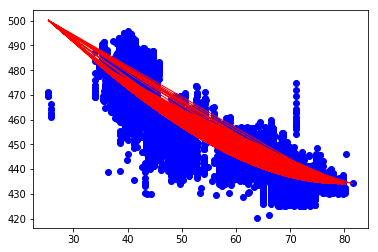

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:33   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
#x_poly_T = poly_reg.transform(PowerPlant_data['T'])
x_poly_V = poly_reg.fit_transform(PowerPlant_data['V'].values.reshape(-1,1))
#print(x_poly_V)


# build a linear regression model
Poly_regr_V = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
Poly_regr_V.fit(x_poly_V, PowerPlant_data['EP'])
 
# slope and intercept
a_Poly_V, b_Poly_V = Poly_regr_V.coef_, Poly_regr_V.intercept_

#predict
Poly_V_predict = Poly_regr_V.predict(x_poly_V)


#real data 
plt.scatter(PowerPlant_data['V'], PowerPlant_data['EP'], color='blue')
#plt.show()

#fit data
plt.plot(PowerPlant_data['V'], Poly_V_predict, color='red', linewidth=1)
plt.show()



x_cons_PolyV = sm.add_constant(x_poly_V)
est_PolyV =sm.OLS(PowerPlant_data['EP'], x_cons_PolyV)
est2_PolyV = est_PolyV.fit()
print(est2_PolyV.summary())


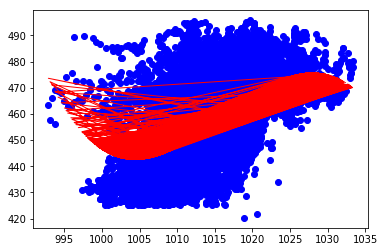

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:33   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [12]:
#poly_reg = PolynomialFeatures(degree = 3)
x_poly_AP = poly_reg.fit_transform(PowerPlant_data['AP'].values.reshape(-1,1))
#print(x_poly_AP)


# build a linear regression model
Poly_regr_AP = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
Poly_regr_AP.fit(x_poly_AP, PowerPlant_data['EP'])
 
# slope and intercept
a_Poly_AP, b_Poly_AP = Poly_regr_AP.coef_, Poly_regr_AP.intercept_

#predict
Poly_AP_predict = Poly_regr_AP.predict(x_poly_AP)


#real data 
plt.scatter(PowerPlant_data['AP'], PowerPlant_data['EP'], color='blue')
#plt.show()

#fit data
plt.plot(PowerPlant_data['AP'], Poly_AP_predict, color='red', linewidth=1)
plt.show()



x_cons_PolyAP = sm.add_constant(x_poly_AP)
est_PolyAP =sm.OLS(PowerPlant_data['EP'], x_cons_PolyAP)
est2_PolyAP = est_PolyAP.fit()
print(est2_PolyAP.summary())


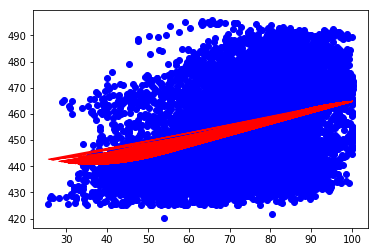

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:34   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

In [13]:
#poly_reg = PolynomialFeatures(degree = 3)
x_poly_RH = poly_reg.fit_transform(PowerPlant_data['RH'].values.reshape(-1,1))
#print(x_poly_RH)


# build a linear regression model
Poly_regr_RH = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
Poly_regr_RH.fit(x_poly_RH, PowerPlant_data['EP'])
 
# slope and intercept
a_Poly_RH, b_Poly_RH = Poly_regr_RH.coef_, Poly_regr_RH.intercept_

#predict
Poly_RH_predict = Poly_regr_RH.predict(x_poly_RH)


#real data 
plt.scatter(PowerPlant_data['RH'], PowerPlant_data['EP'], color='blue')
#plt.show()

#fit data
plt.plot(PowerPlant_data['RH'], Poly_RH_predict, color='red', linewidth=1)
plt.show()



x_cons_PolyRH = sm.add_constant(x_poly_RH)
est_PolyRH =sm.OLS(PowerPlant_data['EP'], x_cons_PolyRH)
est2_PolyRH = est_PolyRH.fit()
print(est2_PolyRH.summary())


## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.
### There is evidence of association of interactions of predictors with the response which shows in the summary.

['x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3']


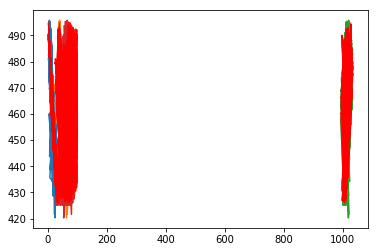

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:35   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

In [14]:
from sklearn.preprocessing import PolynomialFeatures
import warnings

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Create interaction term (not polynomial features)
interaction_full = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
#X_inter_T_V = interaction_T_V.fit_transform(PowerPlant_data[['T','V']].values.reshape(-1,1))
X_inter_full = interaction_full.fit_transform(PowerPlant_data[['T','V','AP','RH']])
#print(X_inter_T_V)
names_g = interaction_full.get_feature_names(input_features=None)
print(names_g)
#print(interaction_full.transform(PowerPlant_data[['T','V','AP','RH']]))

# Create linear regression
regr_full = LinearRegression()

# Fit the linear regression
regr_full.fit(X_inter_full, PowerPlant_data['EP'])

# slope and intercept
a_full, b_full = regr_full.coef_, regr_full.intercept_

#predict
regr_full_predict = regr_full.predict(X_inter_full)


#real data 
plt.plot(PowerPlant_data[['T','V','AP','RH']], PowerPlant_data['EP'])
#plt.show()
# print(PowerPlant_data['T','V'].size)
# print(PowerPlant_data['EP'].size)

#fit data
plt.plot(PowerPlant_data[['T','V','AP','RH']], regr_full_predict, color='red', linewidth=1)
plt.show()



x_cons_full = sm.add_constant(X_inter_full)
est_full =sm.OLS(PowerPlant_data['EP'], x_cons_full)
est2_full = est_full.fit()
print(est2_full.summary())


## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.
### Yes, I can.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train_im, x_test_im, y_train_im, y_test_im = train_test_split(x, y, test_size=0.3, random_state=0)
#print(type(y_train_im))


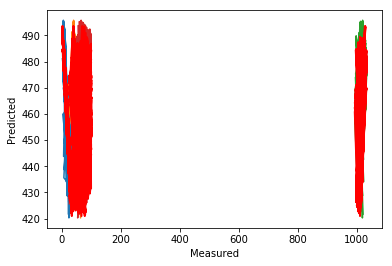

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:36   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [16]:
x = PowerPlant_data[['T','V','AP','RH']]
y = PowerPlant_data['EP']
x_cons = sm.add_constant(x)
# print(x)
# print(y)
# build a linear regression model
regr = LinearRegression(normalize=True)
#print(type(PowerPlant_data))

# fit
regr.fit(x, y) 
regr.fit(x_train_im,y_train_im)
regr_predict_h1_train=regr.predict(x_train_im)
regr_predict_h1_test= regr.predict(x_test_im)


# slope and intercept
beta = []
a, b = regr.coef_, regr.intercept_
beta = [b]
for i in regr.coef_:
    #print(i)
    beta.append(i)
#print("all beta(from 0 to 4):")
#print (a)
#print(beta)
#print(b)

predict = regr.predict(x)
#print(len(predict))

# #real data 
# plt.scatter(x, y, color='blue')
# #plt.show()
# #fit data
# plt.plot(x, predict, color='black', linewidth=2)
# plt.show()

#ax.scatter(y, predict)
plt.plot(x,y)
plt.plot(x,predict,color ='red', linewidth=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

#p-value
est =sm.OLS(y,x_cons)
est2 = est.fit()
print(est2.summary())


#mse
MSE_train_h1 = mean_squared_error(y_train_im, regr_predict_h1_train)
MSE_test_h1 = mean_squared_error(y_test_im, regr_predict_h1_test)
print("MSE_train is:")
print(MSE_train_h1)
print("MSE_test is:")
print(MSE_test_h1)



In [17]:
## all possible interaction and quadratic nonlinearities

from sklearn.preprocessing import PolynomialFeatures
import warnings
from sklearn.metrics import mean_squared_error

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Create interaction term (not polynomial features)
interaction_all = PolynomialFeatures(degree=2, include_bias=False)
#X_inter_T_V = interaction_T_V.fit_transform(PowerPlant_data[['T','V']].values.reshape(-1,1))
# names_h=interaction_all.get_feature_names(input_features=None)
# print(names_h)


X_inter_all_train = interaction_all.fit_transform(x_train_im)
X_inter_all_test = interaction_all.fit_transform(x_test_im)
names_h=interaction_all.get_feature_names(input_features=None)
print(names_h)
#print(X_inter_all_train)

# Create linear regression
regr_all = LinearRegression()

# Fit the linear regression with train 
regr_all.fit(X_inter_all_train, y_train_im)


# slope and intercept
#a_all, b_all = regr_all.coef_, regr_all.intercept_

#predict
regr_all_predict_train = regr_all.predict(X_inter_all_train)
regr_all_predict_test = regr_all.predict(X_inter_all_test)

# print(y_train_im)
# print(regr_all_predict_train)
# print(y_test_im)
# print(regr_all_predict_test)

#mse
MSE_train_h2 = mean_squared_error(y_train_im, regr_all_predict_train)
MSE_test_h2 = mean_squared_error(y_test_im, regr_all_predict_test)
print("MSE_train is:")
print(MSE_train_h2)
print("MSE_test is:")
print(MSE_test_h2)

#real data 
#plt.plot(PowerPlant_data[['T','V','AP','RH']], PowerPlant_data['EP'])
#plt.show()
# print(PowerPlant_data['T','V'].size)
# print(PowerPlant_data['EP'].size)

#fit data
#plt.plot(PowerPlant_data[['T','V','AP','RH']], regr_all_predict, color='red', linewidth=1)
#plt.show()



x_cons_h2 = sm.add_constant(X_inter_all_test)
est_h2 =sm.OLS(y_test_im, x_cons_h2)
est2_h2 = est_h2.fit()
print(est2_h2.summary())


['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']
MSE_train is:
18.36601221197093
MSE_test is:
17.520160997585577
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     3224.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:36   Log-Likelihood:                -8175.9
No. Observations:                2871   AIC:                         1.638e+04
Df Residuals:                    2856   BIC:                         1.647e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err   

In [18]:
### remove the x0*x2(T*AP), x1^2(V^2), x1*x2(V*AP), x1*x3(V*RH)
result= pd.concat([x_train_im, y_train_im], axis=1, sort=False)
#print(result)


regr_all_remove = stat.ols('EP~T+V+AP+RH+T*V+T*RH+AP*RH+T*T+AP*AP+RH*RH', data = result).fit()
train_pred = regr_all_remove.predict(x_train_im)
test_pred = regr_all_remove.predict(x_test_im)

MSE_train_remove = mean_squared_error(y_train_im, train_pred)
MSE_test_remove = mean_squared_error(y_test_im, test_pred)

print("MSE_train is:")
print(MSE_train_remove)
print("MSE_test is:")
print(MSE_test_remove)

# x_cons_h2 = sm.add_constant(X_inter_all_test)
# est_h2 =sm.OLS(y_test_im, 'x0+x1+x2+x3+x0^2+x0 x1+x0 x3+x2^2+x2 x3+x3^2')
# est2_h2 = est_h2.fit()
# print(est2_h2.summary())
print(regr_all_remove.summary())


MSE_train is:
18.9339991055123
MSE_test is:
18.233651778737336
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.371e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:42:36   Log-Likelihood:                -19350.
No. Observations:                6697   AIC:                         3.872e+04
Df Residuals:                    6689   BIC:                         3.877e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## (i) KNN Regression: i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

test error(the number of error/the number of the dataset):
[0.9933820968303727, 0.9996516893068618, 0.9996516893068618, 0.9996516893068618, 1.0, 1.0, 1.0, 0.9996516893068618, 0.9996516893068618, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996516893068618, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996516893068618, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

train error(the number of error/the number of the dataset):
[0.0, 0.990891443930118, 0.9994027176347619, 0.9997013588173809, 1.0, 1.0, 0.9998506794086904, 0.9998506794086904, 0.9998506794086904, 0.9998506794086904, 0.9998506794086904, 0.9998506794086904, 0.9998506794086904, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9998506

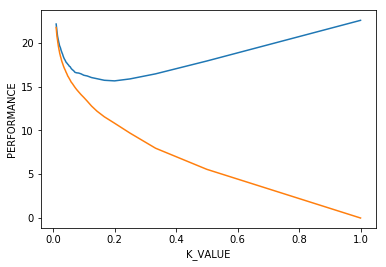

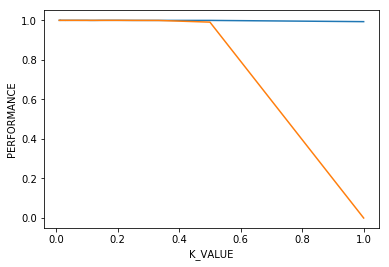

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#raw features
#print(x,y)

#trainning and test set of raw features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#print(x_train)
# y_test_tolist=list(y_test)
# y_train_tolist = list(y_train)
# #print(y_test_tolist)
# #print(y_train_tolist)
#print(len(list(y_train)))
MSE_all_training =[]
MSE_all_test=[]   

error_train_list=[]
error_test_list=[]

training_error = []
test_error = []
k_range = np.arange(1,101,1)
for i in k_range:
    test_e=0
    training_e=0
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(x_train,y_train)
    
    knn_predict_test = neigh.predict(x_test)
    knn_predict_training = neigh.predict(x_train)
    
    training_score = neigh.score(x_train,y_train)
    test_score = neigh.score(x_test,y_test)
    
    training_error.append(1-training_score)
    test_error.append(1-test_score)
    
    MSE_test = mean_squared_error(y_test, knn_predict_test)
    MSE_training = mean_squared_error(y_train, knn_predict_training)
    MSE_all_test.append(MSE_test)
    MSE_all_training.append(MSE_training)
        
    error_test = (y_test!=knn_predict_test).sum()
    error_train = (y_train!=knn_predict_training).sum()
    error_test_list.append(error_test/len(list(y_test)))
    error_train_list.append(error_train/len(list(y_train)))

     
#     print(training_error_num, test_error_num )    
    #print(knn_score)
#print(score)
#print(MSE_all_test)
print("test error(the number of error/the number of the dataset):")
print(error_test_list)
print()
print("train error(the number of error/the number of the dataset):")
print(error_train_list)
print()

#find best k
k_rangetolist = k_range.tolist()
#print(k_rangetolist)
best_k = k_rangetolist[MSE_all_test.index(min(MSE_all_test))]
print('best k is:')
print(best_k)
#print(min(MSE_all_test))

#test_error,training_error in terms of 1/k
plt.plot(1/k_range, MSE_all_test, label='TEST_ERROR')
plt.plot(1/k_range, MSE_all_training, label='TRAINING_ERROR')
plt.xlabel('K_VALUE')
plt.ylabel('PERFORMANCE')
plt.show()

plt.plot(1/k_range, error_test_list, label='TEST_ERROR')
plt.plot(1/k_range, error_train_list, label='TRAINING_ERROR')
plt.xlabel('K_VALUE')
plt.ylabel('PERFORMANCE')
plt.show()

test error(the number of error/the number of the dataset):
[0.9944270289097875, 1.0, 0.9993033786137234, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996516893068618, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

train error(the number of error/the number of the dataset):
[0.0, 0.9920860086605943, 0.9998506794086904, 0.9998506794086904, 1.0, 0.9998506794086904, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

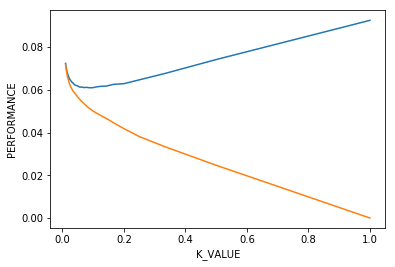

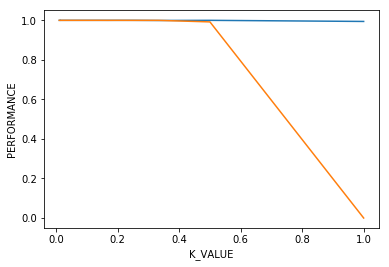

In [20]:
#normalized features
x_normalized = preprocessing.normalize(x, norm='l2')
#y_normalized = preprocessing.normalize(y.values.reshape(-1,1), norm='l2')
y=y-np.mean(y)
y=y/np.std(y)
y_normalized=y
#print(x_normalized)
#print(y_normalized)
#print(type(x_normalized))


#trainning and test set of raw features
xn_train, xn_test, yn_train, yn_test = train_test_split(x_normalized, y_normalized, test_size=0.3, random_state=0)
#print(xn_train)

n_MSE_all_training =[]
n_MSE_all_test=[]

n_error_train_list=[]
n_error_test_list=[]

n_training_error = []
n_test_error = []
n_k_range = np.arange(1,101,1)

#print(n_k_range)
for i in n_k_range:
    neigh_n = KNeighborsRegressor(n_neighbors=i)
    neigh_n.fit(xn_train,yn_train)
    knn_n_predict = neigh_n.predict(xn_test)
    n_training_score = neigh_n.score(xn_train,yn_train)
    n_test_score = neigh_n.score(xn_test,yn_test)
    n_training_error.append(1-n_training_score)
    n_test_error.append(1-n_test_score)
    
    n_MSE_test = mean_squared_error(yn_test, knn_n_predict)
    n_MSE_training = mean_squared_error(yn_train, neigh_n.predict(xn_train))
    n_MSE_all_test.append(n_MSE_test)
    n_MSE_all_training.append(n_MSE_training)
    
    n_error_test = (yn_test!=knn_n_predict).sum()
    n_error_train = (yn_train!=neigh_n.predict(xn_train)).sum()
    n_error_test_list.append(n_error_test/len(list(yn_test)))
    n_error_train_list.append(n_error_train/len(list(yn_train)))
    
    #print(knn_score)
#print(score)
#print(n_MSE_all_test)

print("test error(the number of error/the number of the dataset):")
print(n_error_test_list)
print()
print("train error(the number of error/the number of the dataset):")
print(n_error_train_list)
print()

#find best k
n_k_rangetolist = n_k_range.tolist()
#print(k_rangetolist)
#print(n_test_error.index(min(n_test_error[1:])))
n_best_k = n_k_rangetolist[n_MSE_all_test.index(min(n_MSE_all_test))]
#print('best k is:')
print(n_best_k)
print(min(n_MSE_all_test))

#test_error,training_error in terms of 1/k
plt.plot(1/n_k_range, n_MSE_all_test, label='TEST_ERROR')
plt.plot(1/n_k_range, n_MSE_all_training, label='TRAINING_ERROR')
plt.xlabel('K_VALUE')
plt.ylabel('PERFORMANCE')
plt.show()

plt.plot(1/k_range, n_error_test_list, label='TEST_ERROR')
plt.plot(1/k_range, n_error_train_list, label='TRAINING_ERROR')
plt.xlabel('K_VALUE')
plt.ylabel('PERFORMANCE')
plt.show()



## (j) Compare the results of KNN Regression with linear regression and provide your analysis.
### The result of the KNN is better.

In [21]:
all_MSE = {'MSE of linear regression':MSE_test_h2, 'MSE of KNN regression with raw feature:': min(MSE_all_test), 'MSE of KNN regression': min(n_MSE_all_test)}
#print (all_MSE)
min(all_MSE.values())
print("the lowest MSE is:")
list (all_MSE.keys()) [list (all_MSE.values()).index (min(all_MSE.values()))]


the lowest MSE is:


'MSE of KNN regression'

## 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
## (a) The sample size n is extremely large, and the number of predictors p is small.
## (b) The number of predictors p is extremely large, and the number of observations n is small.
## (c) The relationship between the predictors and response is highly non-linear.
## (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
### flexible method
       

#### (a) Better. A flexible method will fit the data closer and with the large sample size, would perform better than an inflexible approach.

#### (b) Worse. A flexible method would overfit the small number of observations.

#### (c) Better. With more degrees of freedom, a flexible method would fit better than an inflexible one.

#### (d) Worse. A flexible method would fit to the noise in the error terms and increase variance.

## 7. The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
## (a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.
## (b) What is our prediction with K = 1? Why?
## (c) What is our prediction with K = 3? Why?
## (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?


#### the answers are shown  in the scan picture.
#### (d) As K becomes larger, the boundary becomes inflexible (linear). So in this case we would expect the best value for K to be small.